## Final Project - The Battle of Neighborhoods

<h3>1. Introduction </h3>

Rio de Janeiro is well-known as place with multiple beaches, sun most part of the year, happiness, and carnival. As place that mix both nature and buildings, it attracts lots of turists regularly throughout a normal year. So normally, before move on a travel to Brazil is interesting to find useful information about trustful places to visit.

<h3> 2. Describing the situation</h3>

Imagine a situation where a tourist wants to visit places beyond famous beaches or any other touristic places, moreover, as a nature explorer, he wants to know some waterfalls, because he read it in a forum on internet. In order to achieve this goal, and considering his hotel is near Copacabana beach, he needs to capture different locations and analyze ratings as a touchstone to feel safe.

<h3> 3. Gathering the data from Foursquare </h3>

First of all, all libraries required to make all the analysis are detailed below.

In [4]:
import pandas as pd
import numpy as np
import folium
import requests
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim

from IPython.display import Image 
from IPython.core.display import HTML 

Credentials, version and limit must be provided, in order to use the Foursquare API.

In [5]:
CLIENT_ID = 'WVW0HSJAVFJYY1EOL2EAVB30SLXIGM5LNIFEZX3QF5NAMMKB' # Foursquare ID
CLIENT_SECRET = 'FMBXRFDAWCPH14NJCAUZEU2GXRWVBYN0XECPUM5NIELTKZMI' # Foursquare Secret
ACCESS_TOKEN = '5O34IB2J505FIA3Y2YMRH33U03RXAXDAWLDXUEYX4XKKP3P4'
VERSION = '20180604'
LIMIT = 100

After that, we need to find the first reference, which is Copacabana, the place that the tourist has been hosted. To do that, the address is expressed in a generic way just to ensure the reference is appropriated to compare with the final results.

In [6]:
address = 'Copacabana, Rio de Janeiro, Brazil'

#Defining latitude and longitude for Copacabana
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.9719642 -43.1843432


The place was setted, so it is time to write a query with a portuguese word for waterfall (cachoeira). This choice was made, because using the english word gave poor results.

In [7]:
#defining the desired query
search_query = 'cachoeira'
radius = 20000

Now it is time to run the Foursquare API. This request is joining multiple variables as 'search_query' and all credentials.   

In [8]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

In [9]:
#show json results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60bebeafa5bf3b7c7475cd82'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4bc1cda674a9a5938e3ed2f6',
    'name': 'Cachoeira do Chuveiro',
    'location': {'address': 'Estrada Dona Castorina',
     'crossStreet': 'Parque Nacional da Tijuca',
     'lat': -22.96632435745544,
     'lng': -43.24286763469779,
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.96632435745544,
       'lng': -43.24286763469779}],
     'distance': 6031,
     'postalCode': '22460-320',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'state': 'RJ',
     'country': 'Brasil',
     'formattedAddress': ['Estrada Dona Castorina (Parque Nacional da Tijuca)',
      'Rio de Janeiro, RJ',
      '22460-320']},
    'categories': [{'id': '4eb1d4dd4b900d56c88a45fd',
      'name': 'River',
      'pluralName': 'Rivers',
      'shortName': 'River',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

In [10]:
#select only the venues
venues = results['response']['venues']

#transform json into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4bc1cda674a9a5938e3ed2f6,Cachoeira do Chuveiro,"[{'id': '4eb1d4dd4b900d56c88a45fd', 'name': 'R...",v-1623113391,False,Estrada Dona Castorina,Parque Nacional da Tijuca,-22.966324,-43.242868,"[{'label': 'display', 'lat': -22.9663243574554...",6031,22460-320,BR,Rio de Janeiro,RJ,Brasil,[Estrada Dona Castorina (Parque Nacional da Ti...
1,501a7ff8e4b04620d5ff1ceb,Cachoeira do Jardim Botânico,"[{'id': '56aa371be4b08b9a8d573560', 'name': 'W...",v-1623113391,False,Jardim Botânico do Rio de Janeiro,NaN,-22.969508,-43.224679,"[{'label': 'display', 'lat': -22.9695075649558...",4143,22470-180,BR,Rio de Janeiro,RJ,Brasil,"[Jardim Botânico do Rio de Janeiro, Rio de Jan..."
2,53556b5b498ed5c9b3a22f54,Cachoeira dos Primatas,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",v-1623113391,False,NaN,NaN,-22.981304,-43.221855,"[{'label': 'display', 'lat': -22.9813041687011...",3982,NaN,BR,NaN,NaN,Brasil,NaN
3,5416fc37498ec124d60fac7c,Cachoeira do Horto,"[{'id': '56aa371be4b08b9a8d573560', 'name': 'W...",v-1623113391,False,NaN,NaN,-22.965870,-43.235182,"[{'label': 'display', 'lat': -22.9658701606438...",5254,NaN,BR,NaN,NaN,Brasil,NaN
4,51815585498e0a971f9cbf3c,cachoeira do horto,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",v-1623113391,False,NaN,NaN,-22.964821,-43.229177,"[{'label': 'display', 'lat': -22.9648214849230...",4663,NaN,BR,NaN,NaN,Brasil,NaN


<h3>3. Displaying the data </h3>

After transform the data into a dataframe, now we need to clean the data, filter the important features and, finally, plot it inside a map.

In [11]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Cachoeira do Chuveiro,River,Estrada Dona Castorina,Parque Nacional da Tijuca,-22.966324,-43.242868,"[{'label': 'display', 'lat': -22.9663243574554...",6031,22460-320,BR,Rio de Janeiro,RJ,Brasil,[Estrada Dona Castorina (Parque Nacional da Ti...,4bc1cda674a9a5938e3ed2f6
1,Cachoeira do Jardim Botânico,Waterfall,Jardim Botânico do Rio de Janeiro,NaN,-22.969508,-43.224679,"[{'label': 'display', 'lat': -22.9695075649558...",4143,22470-180,BR,Rio de Janeiro,RJ,Brasil,"[Jardim Botânico do Rio de Janeiro, Rio de Jan...",501a7ff8e4b04620d5ff1ceb
2,Cachoeira dos Primatas,Trail,NaN,NaN,-22.981304,-43.221855,"[{'label': 'display', 'lat': -22.9813041687011...",3982,NaN,BR,NaN,NaN,Brasil,NaN,53556b5b498ed5c9b3a22f54
3,Cachoeira do Horto,Waterfall,NaN,NaN,-22.965870,-43.235182,"[{'label': 'display', 'lat': -22.9658701606438...",5254,NaN,BR,NaN,NaN,Brasil,NaN,5416fc37498ec124d60fac7c
4,cachoeira do horto,Historic Site,NaN,NaN,-22.964821,-43.229177,"[{'label': 'display', 'lat': -22.9648214849230...",4663,NaN,BR,NaN,NaN,Brasil,NaN,51815585498e0a971f9cbf3c


In [12]:
#displaying all categories
dataframe_filtered[['categories']].value_counts()

categories          
River                   5
Waterfall               5
Road                    3
Trail                   3
Bar                     2
Church                  1
Garden Center           1
Gas Station             1
Historic Site           1
Mountain                1
Nature Preserve         1
Other Great Outdoors    1
Snack Place             1
Stables                 1
Sushi Restaurant        1
dtype: int64

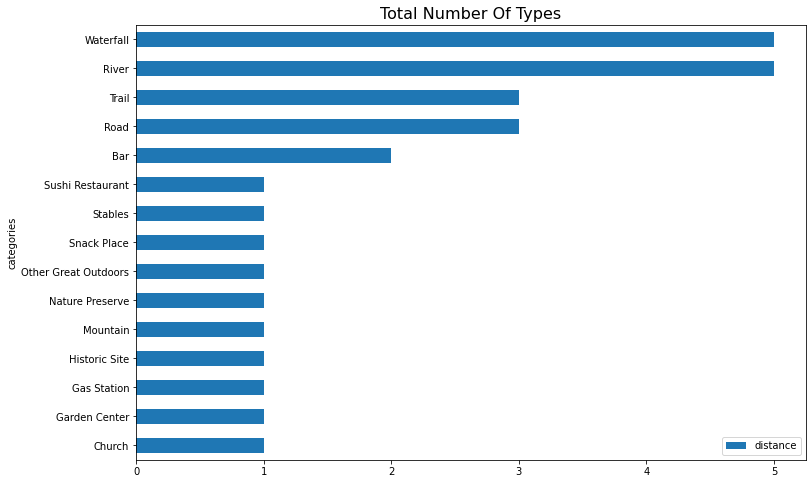

In [29]:
dataframe_pt = dataframe_filtered.pivot_table(index=['categories'], values=['distance'], aggfunc='count')
dataframe_pt.sort_values(by=['distance']).plot(kind="barh", figsize=(12, 8))
plt.title("Total Number Of Types", loc="center", fontsize=16)
plt.show()

Considering that 'cachoeira' can be used in multiple venues beyond the place itself, it is important to filter undesired results, as shown below. In order to simplify, only some categories were chosen, mostly related to the purpose.

In [10]:
#Filter for categories
places = ['Waterfall', 'River', 'Other Great Outdoors', 'Mountain', 'Nature Preserve', 'Trail']
df_filtered = dataframe_filtered[dataframe_filtered.categories.isin(places)]
df_filtered.describe(include = 'all')

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
count,16,16,7,2,16.000000,16.000000,16,16.0000,4,16,7,7,16,8,16
unique,15,6,6,2,NaN,NaN,16,NaN,4,1,2,1,1,8,16
top,Cachoeira dos Primatas,Waterfall,Parque Nacional da Tijuca,Alto da Boa Vista,NaN,NaN,"[{'label': 'display', 'lat': -22.92937, 'lng':...",NaN,20531-573,BR,Rio de Janeiro,RJ,Brasil,"[Jardim Botânico do Rio de Janeiro, Rio de Jan...",54e37582498ef55418f283ae
freq,2,5,2,1,NaN,NaN,1,NaN,1,16,6,7,16,1,1
mean,NaN,NaN,NaN,NaN,-22.950383,-43.249488,NaN,8708.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.042391,0.055047,NaN,5188.8938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-22.999939,-43.372901,NaN,3982.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,-22.967073,-43.278193,NaN,5227.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,-22.965605,-43.244995,NaN,6466.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,-22.953950,-43.230229,NaN,9985.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By reducing the number of venues, we expect to see these spots distributed in a map. So red markers will be added to mark the initial position and blue markers to show the multiple options.

In [11]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) 

# add a red circle marker to represent the Copacabana Beach
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Copacabana beach',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add blue circle markers to represent all filtered waterfalls
for lat, lng, category, name in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories, df_filtered.name):
    label = '{}, {}'.format(category, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Even though the number of option is not big, it is impossible to visit of all of them. As we can see, some of them are really far from the initial position. To reduce even more, we will see the distance and try to focus on the nearest spots.

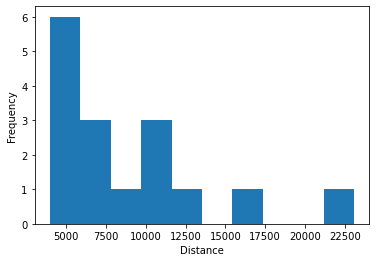

In [12]:
#display the distribution of waterfalls in terms of distance
plt.hist(df_filtered.distance)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [13]:
# reducing the options to a maximum of 10 km
df_filtered2 = df_filtered[df_filtered.distance <= 10000]

In [14]:
# removing duplicated data
df_filtered3 = df_filtered2.drop(index = 3, axis = 0)

In [15]:
df_filtered3.reset_index(drop = True)
df_filtered3.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Cachoeira do Chuveiro,River,Estrada Dona Castorina,Parque Nacional da Tijuca,-22.966324,-43.242868,"[{'label': 'display', 'lat': -22.9663243574554...",6031,22460-320,BR,Rio de Janeiro,RJ,Brasil,[Estrada Dona Castorina (Parque Nacional da Ti...,4bc1cda674a9a5938e3ed2f6
1,Cachoeira do Jardim Botânico,Waterfall,Jardim Botânico do Rio de Janeiro,NaN,-22.969508,-43.224679,"[{'label': 'display', 'lat': -22.9695075649558...",4143,22470-180,BR,Rio de Janeiro,RJ,Brasil,"[Jardim Botânico do Rio de Janeiro, Rio de Jan...",501a7ff8e4b04620d5ff1ceb
2,Cachoeira do Horto,Waterfall,NaN,NaN,-22.965870,-43.235182,"[{'label': 'display', 'lat': -22.9658701606438...",5254,NaN,BR,NaN,NaN,Brasil,NaN,5416fc37498ec124d60fac7c
6,Cachoeira das Paineiras,Waterfall,Paineiras,NaN,-22.954767,-43.230966,"[{'label': 'display', 'lat': -22.954767, 'lng'...",5147,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Paineiras, Rio de Janeiro, RJ]",587e4862102f470580acfb47
7,Cachoeira dos Primatas,River,Parque Nacional da Tijuca,NaN,-22.958412,-43.228018,"[{'label': 'display', 'lat': -22.9584122732009...",4723,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Parque Nacional da Tijuca, Rio de Janeiro, RJ]",4c8d062555fba093eb8b64ab


In [16]:
df_filtered3.shape

(11, 15)

<h3>4. Rating the filtered data</h3>

From this point, we know that we reduce our dataset to 11 options. However, in order to make sure these options are feasible, this tourist wants to evaluate if these waterfalls are safe to visit and the easiest way to do it is by getting the ratings other people gave in Foursquare. 

In [17]:
# run a loop to query the rating from each venue in dataframe
list_venues = []
for venue in df_filtered3['id']:
    url_venues = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    result = requests.get(url_venues).json()
    try:
        list_venues.append(result['response']['venue']['rating'])
    except:
        list_venues.append(0)

In [18]:
list_venues

[7.9, 7.7, 7.6, 0, 8.2, 0, 0, 0, 0, 0, 0]

In [19]:
# add rating column and values to the dataframe
df_filtered3['rating'] = pd.Series(list_venues).values
df_filtered3.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,rating
0,Cachoeira do Chuveiro,River,Estrada Dona Castorina,Parque Nacional da Tijuca,-22.966324,-43.242868,"[{'label': 'display', 'lat': -22.9663243574554...",6031,22460-320,BR,Rio de Janeiro,RJ,Brasil,[Estrada Dona Castorina (Parque Nacional da Ti...,4bc1cda674a9a5938e3ed2f6,7.9
1,Cachoeira do Jardim Botânico,Waterfall,Jardim Botânico do Rio de Janeiro,NaN,-22.969508,-43.224679,"[{'label': 'display', 'lat': -22.9695075649558...",4143,22470-180,BR,Rio de Janeiro,RJ,Brasil,"[Jardim Botânico do Rio de Janeiro, Rio de Jan...",501a7ff8e4b04620d5ff1ceb,7.7
2,Cachoeira do Horto,Waterfall,NaN,NaN,-22.965870,-43.235182,"[{'label': 'display', 'lat': -22.9658701606438...",5254,NaN,BR,NaN,NaN,Brasil,NaN,5416fc37498ec124d60fac7c,7.6
6,Cachoeira das Paineiras,Waterfall,Paineiras,NaN,-22.954767,-43.230966,"[{'label': 'display', 'lat': -22.954767, 'lng'...",5147,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Paineiras, Rio de Janeiro, RJ]",587e4862102f470580acfb47,0.0
7,Cachoeira dos Primatas,River,Parque Nacional da Tijuca,NaN,-22.958412,-43.228018,"[{'label': 'display', 'lat': -22.9584122732009...",4723,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Parque Nacional da Tijuca, Rio de Janeiro, RJ]",4c8d062555fba093eb8b64ab,8.2


In [20]:
# splitting the data rated and unrated
rated = df_filtered3[df_filtered3.rating > 0]
unrated = df_filtered3[df_filtered3.rating == 0]

In [21]:
rated

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,rating
0,Cachoeira do Chuveiro,River,Estrada Dona Castorina,Parque Nacional da Tijuca,-22.966324,-43.242868,"[{'label': 'display', 'lat': -22.9663243574554...",6031,22460-320,BR,Rio de Janeiro,RJ,Brasil,[Estrada Dona Castorina (Parque Nacional da Ti...,4bc1cda674a9a5938e3ed2f6,7.9
1,Cachoeira do Jardim Botânico,Waterfall,Jardim Botânico do Rio de Janeiro,NaN,-22.969508,-43.224679,"[{'label': 'display', 'lat': -22.9695075649558...",4143,22470-180,BR,Rio de Janeiro,RJ,Brasil,"[Jardim Botânico do Rio de Janeiro, Rio de Jan...",501a7ff8e4b04620d5ff1ceb,7.7
2,Cachoeira do Horto,Waterfall,NaN,NaN,-22.965870,-43.235182,"[{'label': 'display', 'lat': -22.9658701606438...",5254,NaN,BR,NaN,NaN,Brasil,NaN,5416fc37498ec124d60fac7c,7.6
7,Cachoeira dos Primatas,River,Parque Nacional da Tijuca,NaN,-22.958412,-43.228018,"[{'label': 'display', 'lat': -22.9584122732009...",4723,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Parque Nacional da Tijuca, Rio de Janeiro, RJ]",4c8d062555fba093eb8b64ab,8.2


<h3>5. Conclusion </h3>

After displaying the plot with all the possible results and all further analysis developed later to reduce the options, it is possible to display a new graph. At this time, locations that were rated will be chosen by the tourist, because all of them received good scores (> 7.0), and they will appear in a yellow dot. The unrated will be displayed in blue dots as in the previous one. 

In [22]:
venues_map_reviewed = folium.Map(location=[latitude, longitude], zoom_start=13) 

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Copacabana beach',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map_reviewed)

# markers for chosen locations
for lat, lng, category, name in zip(rated.lat, rated.lng, rated.categories, rated.name):
    label = '{}, {}'.format(category, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map_reviewed)
    
# markers for the other locations
for lat, lng, category, name in zip(unrated.lat, unrated.lng, unrated.categories, unrated.name):
    label = '{}, {}'.format(category, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_reviewed)

venues_map_reviewed